In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# General Libraries
import numpy as np
import pandas as pd

# NLP Libraries
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK (For Tokenization and Stopword Removal)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
df = pd.read_csv('drive/My Drive/dataset.csv')

In [4]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [7]:
df = df.dropna()

In [8]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text (split into words)
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Remove non-alphabetic characters (punctuation, numbers, etc.)
    words = [word for word in words if word.isalpha()]

    # Lemmatize the words (convert to root form)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a string
    return ' '.join(lemmatized_words)


In [9]:
df['processed_text'] = df['statement'].apply(preprocess_text)

<ipython-input-9-62f3191904c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['statement'].apply(preprocess_text)


In [10]:
df

,statement,status,processed_text
0,oh my gosh,Anxiety,oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,shifted focus something else still worried
4,"I'm restless and restless, it's been a month n...",Anxiety,restless restless month boy mean
...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,nobody take seriously dealt year used great pe...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,selfishness feel good like belong world think ...
53040,Is there any way to sleep better? I can't slee...,Anxiety,way sleep better ca sleep night med help
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,public speaking tip hi give presentation work ...


In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, df['status'], test_size=0.3, random_state=42)


### Logistic Regression

In [13]:

# Train Logistic Regression model
model = LogisticRegression(
    solver='liblinear',        # Algorithm to use for optimization (other options: 'newton-cg', 'lbfgs', 'sag', 'saga')
    penalty='l2',              # Regularization type (can also be 'l1' or 'elasticnet')
    C=1.0,                     # Inverse of regularization strength (smaller values specify stronger regularization)
    max_iter=1000,              # Maximum number of iterations for the solver to converge
    multi_class='auto',        # Multiclass strategy (can also be 'ovr' or 'multinomial')
    random_state=42            # Seed for random number generation
)
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', random_state=42,
                   solver='liblinear')

In [14]:
# Predict on the test set and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

             Anxiety       0.81      0.72      0.76      1134
             Bipolar       0.88      0.60      0.71       814
          Depression       0.66      0.72      0.69      4537
              Normal       0.81      0.95      0.88      4987
Personality disorder       0.96      0.31      0.47       332
              Stress       0.77      0.34      0.47       780
            Suicidal       0.66      0.61      0.64      3221

            accuracy                           0.74     15805
           macro avg       0.79      0.61      0.66     15805
        weighted avg       0.74      0.74      0.73     15805



In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 73.81%


# Confusion Matrix

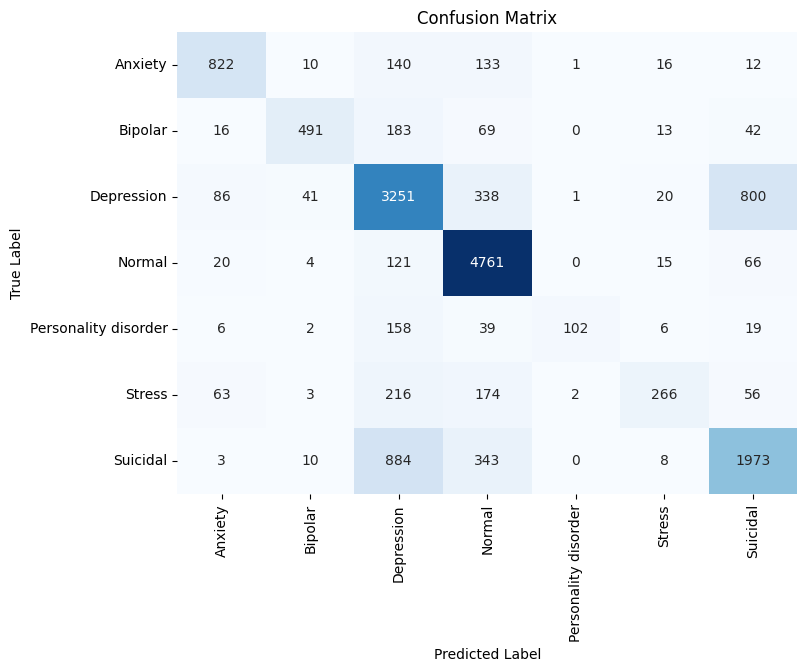

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### KNN Model

In [ ]:
# Step 2: Train KNN Model
knn = KNeighborsClassifier(
    n_neighbors=3,           # Number of neighbors to use for classification
    weights='uniform',       # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',        # Algorithm to compute nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,            # Leaf size passed to the tree-based algorithms
    p=2,                     # Power parameter for the Minkowski distance (p=1 for Manhattan, p=2 for Euclidean)
    metric='minkowski',      # Distance metric to use ('minkowski' is default, can use 'euclidean', 'manhattan', etc.)
    n_jobs=-1                # The number of parallel jobs to run (set to -1 to use all processors)
)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [ ]:
# Step 3: Predict the Test Data
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

                      precision    recall  f1-score   support

             Anxiety       0.70      0.12      0.20      1134
             Bipolar       0.50      0.01      0.02       814
          Depression       0.66      0.04      0.07      4537
              Normal       0.32      0.98      0.49      4987
Personality disorder       0.86      0.04      0.07       332
              Stress       0.83      0.03      0.06       780
            Suicidal       0.66      0.04      0.07      3221

            accuracy                           0.34     15805
           macro avg       0.65      0.18      0.14     15805
        weighted avg       0.56      0.34      0.21     15805



In [ ]:
# Step 4: Calculate Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')


KNN Accuracy: 33.86%


### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',              # The function to measure the quality of a split ('gini' or 'entropy')
    splitter='best',               # Strategy used to split at each node ('best' or 'random')
    max_depth=None,                # The maximum depth of the tree (None means nodes are expanded until all leaves are pure)
    min_samples_split=2,           # The minimum number of samples required to split an internal node
    min_samples_leaf=1,            # The minimum number of samples required to be at a leaf node
    max_features=None,             # The number of features to consider when looking for the best split (None means all features)
    random_state=42,               # Random seed for reproducibility
    max_leaf_nodes=None,           # The maximum number of leaf nodes (None means unlimited)
    min_impurity_decrease=0.0,     # Minimum impurity decrease required for a split to occur
    class_weight=None             # Weights associated with classes, use 'balanced' for imbalance dataset
)

dt.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:
# Step 3: Predict the Test Data
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

                      precision    recall  f1-score   support

             Anxiety       0.60      0.59      0.60      1134
             Bipolar       0.58      0.53      0.56       814
          Depression       0.57      0.58      0.57      4537
              Normal       0.82      0.87      0.85      4987
Personality disorder       0.56      0.47      0.51       332
              Stress       0.42      0.38      0.40       780
            Suicidal       0.49      0.48      0.48      3221

            accuracy                           0.64     15805
           macro avg       0.58      0.56      0.57     15805
        weighted avg       0.63      0.64      0.63     15805



In [ ]:
# Step 4: Calculate Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')

Decision Tree Accuracy: 63.63%


# **XGB Classifier**

In [ ]:
label_encoder = LabelEncoder()
y_train =label_encoder.fit_transform(y_train)
y_test =label_encoder.fit_transform(y_test)

In [ ]:
xgb_model = XGBClassifier(
    objective="multi:softmax",  # For multi-class classification
    num_class=7,               # Number of classes
    max_depth=8,              # Maximum depth of a tree
    learning_rate=0.01,        # Lower learning rate for better generalization
    n_estimators=1000,         # Increased number of estimators
    subsample=0.8,             # Subsample ratio
    colsample_bytree=0.8,      # Feature sample ratio
    random_state=42,           # Random seed for reproducibility
    tree_method="hist",        # Use histogram-based algorithm
    device="cuda"              # Enable GPU support
)

# Train the model
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [ ]:
# Make predictions
preds = xgb_model.predict(X_test)

# Convert predictions to integers
preds = preds.astype(int)  # Ensure the predictions are integers


# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))


Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1134
           1       0.88      0.72      0.79       814
           2       0.67      0.73      0.70      4537
           3       0.86      0.94      0.90      4987
           4       0.93      0.52      0.66       332
           5       0.74      0.46      0.57       780
           6       0.68      0.63      0.66      3221

    accuracy                           0.76     15805
   macro avg       0.80      0.68      0.72     15805
weighted avg       0.76      0.76      0.76     15805



# ANN Model


In [ ]:
# Step 4: Train the ANN model
clf = MLPClassifier(
    hidden_layer_sizes=(150, 100),       # Two hidden layers: 150 neurons in the first, 100 in the second
    max_iter=600,                         # Increase the number of iterations to allow convergence
    activation='relu',                    # ReLU activation function for faster convergence
    solver='adam',                        # Adam optimizer
    learning_rate_init=0.001,             # Smaller learning rate for better convergence
    alpha=0.001,                          # L2 regularization to prevent overfitting
    batch_size='auto',                    # Use the default batch size
    random_state=42                       # Ensure reproducibility
)
clf.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(150, 100), max_iter=600,
              random_state=42)

In [ ]:
# Step 5: Evaluate the model
y_pred_ann = clf.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)

print(f"Model Accuracy: {accuracy_ann * 100 :.2f}%")

Model Accuracy: 72.66%


In [ ]:
import joblib

# Save the model to a file
joblib.dump(dt, 'model.pkl')


In [ ]:
# Save the model to a file
joblib.dump(xgb, 'xgb_model.pkl')